In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('../player_info.csv')

In [3]:
df

,player_id,firstName,lastName,nationality,birthCity,primaryPosition,birthDate,birthStateProvince,height,height_cm,weight,shootsCatches
0,8466148,Marian,Hossa,SVK,Stará Lubovna,RW,1979-01-12 00:00:00,NaN,"6' 1""",185.42,207.0,L
1,8465058,Michal,Rozsival,CZE,Vlasim,D,1978-09-03 01:00:00,NaN,"6' 1""",185.42,210.0,R
2,8476906,Shayne,Gostisbehere,USA,Pembroke Pines,D,1993-04-20 01:00:00,FL,"5' 11""",180.34,180.0,L
3,8466285,Brian,Campbell,CAN,Strathroy,D,1979-05-23 01:00:00,ON,"5' 10""",177.80,192.0,L
4,8470607,Brent,Seabrook,CAN,Richmond,D,1985-04-20 01:00:00,BC,"6' 3""",190.50,220.0,R
...,...,...,...,...,...,...,...,...,...,...,...,...
3920,8479374,Adam,Mascherin,CAN,Maple,LW,1998-06-06 01:00:00,ON,"5' 10""",177.80,205.0,L
3921,8479403,Tyler,Parsons,USA,Mt. Clemas,G,1997-09-18 01:00:00,MI,"6' 1""",185.42,185.0,L
3922,8480970,Marcus,Hogstrom,SWE,Sveg,D,1989-03-20 00:00:00,NaN,"6' 4""",193.04,200.0,L
3923,8477574,Parker,Milner,USA,Pittsburgh,G,1990-09-06 01:00:00,PA,"6' 1""",185.42,185.0,L


 This is the data that I will be working with to examine player demographics. It is a list of both active and retired NHL players and consists of many character profile stats such as: Player ID, Name, Weight, and Height. For my analysis I will be be focusing on Nationality and shooting / catching hand to investigate a demographic breakdown of any correlation between country of origin and handedness.

In [4]:
df.describe(include='object').T

,count,unique,top,freq
firstName,3925,928,Mike,70
lastName,3925,3153,Smith,23
nationality,3917,28,CAN,1896
birthCity,3920,1436,Toronto,107
primaryPosition,3925,5,D,1208
birthDate,3925,3291,1991-01-03 00:00:00,5
birthStateProvince,2802,50,ON,746
height,3922,18,"6' 1""",760
shootsCatches,3908,2,L,2594


After sorting the unique values and the most common response it apears that the most repressented country in the NHL is expectedly Canada. This should come as no suprise to anyone who follows hockey as many of the American teams have Canadians on their roster. The other important statistic to come from this table is that left handedness is the most common shooting or catching hand. Of the 3908 player profiles that have handedness listed, shooting or catching from the left counts for 2594 of the entries.

In [5]:
def load_and_process():

    df1 = (
        pd.read_csv("../player_info.csv")
        .drop('birthCity', axis=1)
        .drop('birthDate', axis=1)
        .drop('birthStateProvince', axis=1)
        .drop('primaryPosition', axis=1)
        .drop('weight', axis=1)
        .drop('height_cm', axis=1)
        .drop('height', axis=1)
    )
    
    df2 = (
            df1
            .rename(columns={'shootsCatches': 'Shooting / Catching Hand'})
            .rename(columns={'player_id': 'Player ID'})
            .set_index('Shooting / Catching Hand')                                       
            .rename(index={'L': 'Left'})
            .rename(index={'R': 'Right'})
       
    )
    
    return df2
                
        

In [6]:
load_and_process()

,Player ID,firstName,lastName,nationality
Shooting / Catching Hand,,,,
Left,8466148,Marian,Hossa,SVK
Right,8465058,Michal,Rozsival,CZE
Left,8476906,Shayne,Gostisbehere,USA
Left,8466285,Brian,Campbell,CAN
Right,8470607,Brent,Seabrook,CAN
...,...,...,...,...
Left,8479374,Adam,Mascherin,CAN
Left,8479403,Tyler,Parsons,USA
Left,8480970,Marcus,Hogstrom,SWE


I wrote a function that would take the raw dataset csv file and clean, wrangle, and process the data I want to look at all in one line of code. The main alterations I made to the dataset was to remove unecessary columns, rename some of the column titles to provide more clarity, and rename the variables in the Shooting / Catching hand to remove the abbreviated L and R values    

In [7]:
df1 = df

In [8]:
df1 = df.drop(['birthCity','birthDate','birthStateProvince','height','primaryPosition','height_cm','weight'], axis='columns')

In [9]:
df1['shootsCatches'] = df1['shootsCatches'].replace(['L','R'],['1','2'])

In [10]:
df1['shootsCatches'].astype(str)

0       1
1       2
2       1
3       1
4       2
       ..
3920    1
3921    1
3922    1
3923    1
3924    2
Name: shootsCatches, Length: 3925, dtype: object

In [11]:
pd.to_numeric(df1['shootsCatches'])

0       1.0
1       2.0
2       1.0
3       1.0
4       2.0
       ... 
3920    1.0
3921    1.0
3922    1.0
3923    1.0
3924    2.0
Name: shootsCatches, Length: 3925, dtype: float64

In [13]:
df1['shootsCatches'] = pd.to_numeric(df1['shootsCatches'])

In [14]:
df1['shootsCatches']

0       1.0
1       2.0
2       1.0
3       1.0
4       2.0
       ... 
3920    1.0
3921    1.0
3922    1.0
3923    1.0
3924    2.0
Name: shootsCatches, Length: 3925, dtype: float64

In [15]:
df1['nationality'].astype(str)

0       SVK
1       CZE
2       USA
3       CAN
4       CAN
       ... 
3920    CAN
3921    USA
3922    SWE
3923    USA
3924    USA
Name: nationality, Length: 3925, dtype: object

In [17]:
print(pd.unique(df1['nationality']))

['SVK' 'CZE' 'USA' 'CAN' 'SWE' 'RUS' 'FRA' 'CHE' 'AUT' 'DEU' 'LVA' 'FIN'
 'DNK' 'NOR' 'SVN' 'NLD' 'GBR' 'LTU' 'HRV' 'AUS' 'BLR' nan 'UKR' 'KAZ'
 'NGA' 'BHS' 'JPN' 'POL' 'ITA']


In [18]:
df1['nationality'] = df1['nationality'].replace(['SVK','CZE','USA','CAN','SWE','RUS','FRA','CHE','AUT','DEU','LVA','FIN','DNK','NOR','SVN','NLD','GBR','LTU','HRV','AUS','BLR','nan','UKR','KAZ','NGA','BHS','JPN','POL','ITA'],['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29'])

In [19]:
print(pd.unique(df1['nationality']))

['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '20' '21' nan '23' '24' '25' '26' '27' '28' '29']


In [20]:
df1['nationality'].astype(str)

0       1
1       2
2       3
3       4
4       4
       ..
3920    4
3921    3
3922    5
3923    3
3924    3
Name: nationality, Length: 3925, dtype: object

In [22]:
pd.to_numeric(df1['nationality'])

0       1.0
1       2.0
2       3.0
3       4.0
4       4.0
       ... 
3920    4.0
3921    3.0
3922    5.0
3923    3.0
3924    3.0
Name: nationality, Length: 3925, dtype: float64

In [23]:
df1['nationality'] = pd.to_numeric(df1['nationality'])

In [24]:
df1.dtypes

player_id          int64
firstName         object
lastName          object
nationality      float64
shootsCatches    float64
dtype: object

The data that I wanted to work with came to be in non-numerical form and as such I was unable to plot the relaionships in the graphs that I was hoping to use. With the code above I converted the non-numerical values of both the shootsCatches and nationality columns into a numerical system. Doing so allowed me to convert the values into float64 values which would allow me to plot the information. Now I am able to use seaborn and pandas graphs to visualize the information.

# Distribution of left vs right handedness

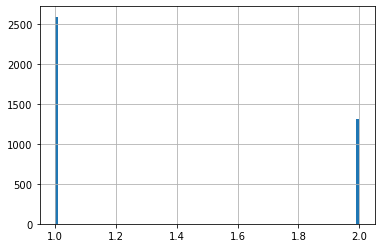

In [25]:
hist = df1['shootsCatches'].hist(bins=100)

This plot shows the distribution between left and right handed players in terms of chooting and catching. In the NHL left handed shooters account for roughly 2/3 of the total player base.

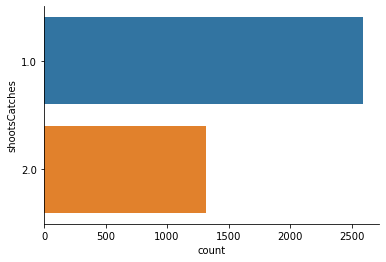

In [26]:
sns.countplot(y='shootsCatches',data=df1)
sns.despine()

This is another plot of the same information regarding player handedness. This is a colour-coded plot to better visualize the difference in scale between left and right handed shooters and catchers

# Player count in respect to Nationality

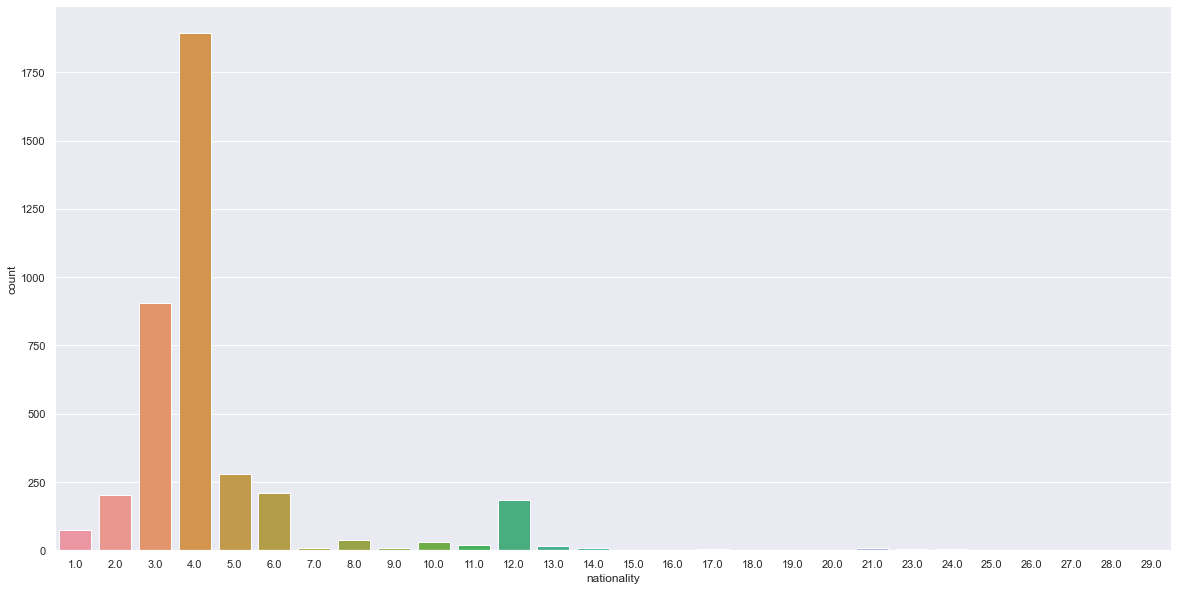

In [27]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.countplot(x='nationality',data=df1,)
sns.despine()

This countplot visualizes player nationality and the total number of players from each country that is represented in the NHL. For the sake of this analysis I will focus on the top 5 countries as they have the most amount of players to analyze. The top 5 countries in terms of players are Canada, USA, Sweeden, Russia, Finlad
Canada, USA, Sweeden, Russia, Finland

# Countplot of nationality,  player count,  and shooting hand

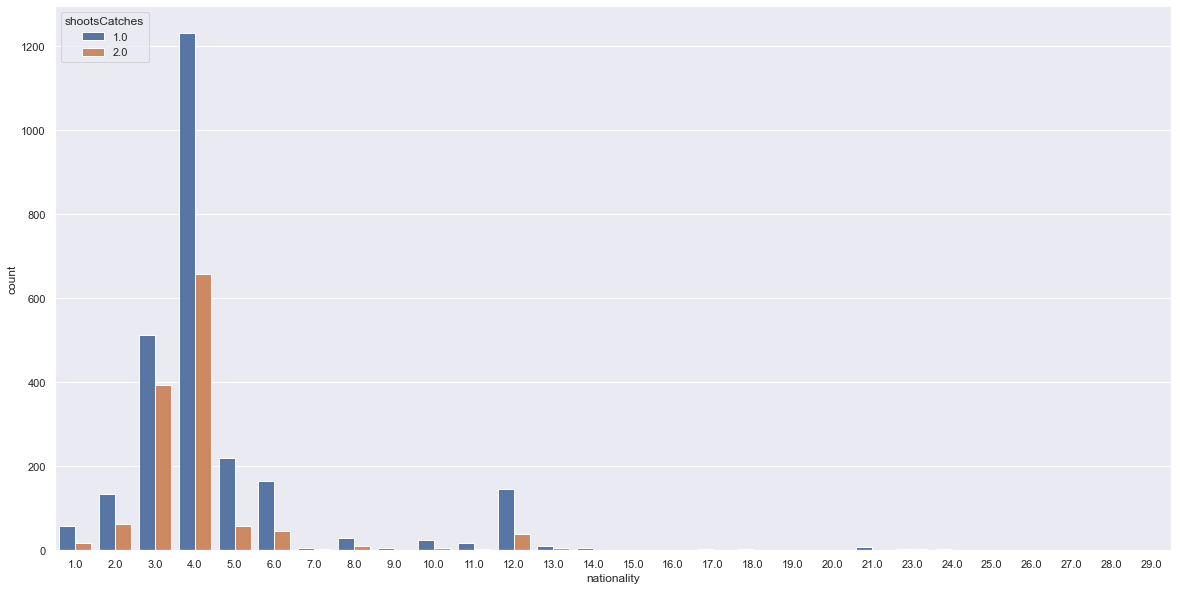

In [28]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.countplot(x='nationality',hue='shootsCatches',data=df1,)
sns.despine()

This final countplot analyzes three variables: shooting / catching hand, nationality, and total player count. After plotting this information it is clear that in the top 6 countries, in terms of player count, left handedness is the most popular style of play. There is no country within the NHL that has produced more right handed players than left. This may be because on average, right handed people shoot left handed on hockey. This information paired with the fact that on average the global population is right handed it can be used to explain a possible correlation between a right handed majority and a left handed shooting style.